# MNIST, Reconnaître les chiffres écrits à la main !
###### Modified National Institute of Standards and Technology

In [1]:
import tensorflow

### Import du jeu de données "mnist" intégré directement à tensorflow, puis chargement des données dans les variables
Le jeu de données MNIST est composé d'un jeu d'entrainement de 60 000 entrées labelisées, pour savoir quels sont les résultats attendus et que l'algorithme s'entraine avec, ainsi que d'un jeu de test composé de 10 000 entrées labelisées aussi, avec lequel je vais pouvoir évaluer la précision du modèle en comparant sa réponse au label fourni

Chaque entrée est un tableau de nombres à deux dimensions ayant une valeur entre 0 et 1 représentant les pixels de l'image. Chaque image réprésente un chiffre entre 0 et 9 que notre modèle va s'entrainer à reconnaitre avec le jeu d'entrainement, puis que je vais évaluer avec le jeu de test

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

### Import de l'architecture

Nous allons maintenant importé les couches ou "layers" pour filtrer nos données. Des données rentrent, puis ressortent dans une forme qui nous est plus utile. La plupart des algorithmes de deep learning consistent à enchaîner plusieurs layers simples qui vont implémenter une forme de "distillation des données" tel un tamis.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])

Ici nous avons 2 "Dense" layers connectées. La 2e layer est une classification softmax à 10 scores. Elle va donc renvoyer 10 scores de probabilité (qui s'additionnent jusqu'à un total de 1) chaque score étant la probabilité que le chiffre de l'image appartienne à une de ces 10 valeurs.

In [8]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

Maintenant préparer notre modèle à l'entrainement il nous faut 3 choses supplémentaires:
 - Un optimiseur, qui va définir comment le modèle va s'adapter aux données qu'il vois pour améliorer sa performance
 - Une fonction de perte (loss), ou comment le modèle va pouvoir évaluer sa performance et ainsi partir dans la bonne direction
 - Des valeurs indicateur pour surveiller la performance pendant l'entrainement et le test. Ici on va simplement se contenter de la précision (accuracy)

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

Avant l'entrainement je vais modifier la forme des données pour qu'elles soient lisibles par notre modèle. Je vais d'abord changer le typage des données, passant de uint8 à float32 puis je passe de valeurs entre 0 et 255, à des valeurs entre 0 et 1. 

Je suis maintenant prêt à commentcer l'entrainement du modèle. Avec Keras cela se fait avec un appel à la fonction "fit()" qui va "fit" mon modèle aux données d'entrainement

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8702 - loss: 0.4409
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.1180
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9794 - loss: 0.0700
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0508
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0374


2 quantités sont affichées pendant l'entrainement, la perte du modèle sur les données d'entrainement, et la précision du modèle sur les données d'entrainement.
Maintenant que le modèle est entrainé, je peux l'utiliser pour "prédire" la valeur d'un chiffre à partir de données qui ne sont pas dans le jeu d'entrainement.

In [11]:
test_digits = test_images[0:20]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([3.2981592e-07, 5.3492474e-08, 3.7454445e-06, 6.6920242e-05,
       8.0320292e-11, 6.2582117e-08, 4.2001541e-12, 9.9992561e-01,
       2.4751424e-07, 3.1554573e-06], dtype=float32)

Chaque nombre dans ce tableau prediction[0] représente la probabilité que chaque chiffre corresponde à l'image. Ici la probabilité la plus haute est à l'index numéro 7, selon notre modèle cela doit donc être un 7

In [12]:
predictions[0].argmax()

7

In [13]:
predictions[0][7]
0.99999106

0.99999106

In [14]:
test_labels[0]

7

On peut vérifier ici dans le label si c'est bien un 7

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.9775 - loss: 0.0738


J'appelle la fonction evaluate() pour tester mon modèle sur les données de test et je récupère les valeurs de perte et de précision

In [16]:
print(f"test_acc: {test_acc}")

test_acc: 0.9812999963760376


La précision du jeu de test est de 97.8%, plus bas qu'avec notre jeu d'entrainement à 98.9%

# Les tenseurs

Dans l'exemple précédent, j'ai utilisé les données d'un "tableau multidimensionnel" NumPy, aussi appelés des tenseurs. En général, la plupart des systèmes d'apprentissage machine utilisent des tenseurs, ils sont fondamentaux dans ce domaine, à tel point que "TensorFlow" a été nommé d'après eux.

## Qu'est ce qu'un tenseur ?

Un tenseur par nature est un conteneur de données, en général numériques. Un des format de données les plus répandu est la matrice, qui est simplement un tenseur de rang 2. Les tenseurs sont une généralisation des matrices avec un nombre arbitraire de dimensions, aussi appelés axes

### Scalars (tenseur de rang 0)
Un tenseur avec un seul chiffre est un "scalar". Il est considéré comme un tenseur à 0 dimensions ou "0D Tensor".
On peut afficher le nombres de dimension d'un tenseur avec la fonction ".ndim" On l'appelle aussi tenseur de rang 0

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

### Vecteurs (tenseurs de rang 1)
Un tableau de nombre est appelé un vecteur ou tenseur de rang 1. Il possède une dimension/axe. Voici un vecteur NumPy

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

Ce vecteur possède 5 entrées, aussi appelé un vecteur à 5 dimensions. Il ne faut pas confondre un "5D Vector" avec un "5D Tensor" ! Un vecteur à 5 dimensions est un vecteur avec un axe et 5 dimensions sur son axe. Tandis qu'un tenseur a 5 axes et un nombre dimensions indéterminé sur ces axes.
La dimensionalité peu soit dénoter le nombres d'entrées spécifiques sur un axes (comme notre 5D vector) oi le nombre d'axes d'un tenseur (comme un 5D Tensor)

### Les Matrices (tenseurs de rang 2)

Un tableau de vecteur est une matrice, ou tenseur de Rang 2 (2D Tensor). Une Matrice a deux axes, souvent appelés "Lignes" et "Colonnes". Il est possible d'interprêter visuellement une matrice comme une grille rectangulaire de nombres. Ceci est une Matrice NumPy

In [22]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])

In [23]:
x.ndim

2

### Tenseurs de rang 3 et au dessus
Si j'insère des matrices dans un nouveau tableau, j'obtient un tenseur de rang 3, que je peux interprêter comme un cube de nombres.

In [24]:
x = np.array([[[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
              [[4,78,2,8,65],
              [6,95,3,35,1],
              [7,80,4,21,2]],
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]])

In [25]:
x.ndim

3

En insérant des tenseurs de rang 3 dans un tableau j'obtient un tenseur de rang 4 et ainsi de suite. En deep learning il est souvent préférable de manipuler des tenseurs allant du rang 0 à 4, même si ça peut aller jusqu'à 5 lors de traitement de données vidéo

### Les Attributs Clés des Tenseurs
 - Son nombre d'axes (rang), par exemple un tenseur de rang 3 a 3 axes et un matrice en a 2. il est aussi appelé le tenseur "ndim" dans les librairies python comme NumPy ou Tensorflow
 - La Forme (Shape), c'est une combinaison de nombres entiers décrivant le nombre de dimensions qu'un tenseur a sur chacun de ses axes. Par exemple la matrice précédente à une forme (3,5), ou le tenseur de rang 3 ci dessus a une forme (3,3,5). Un vecteur a une forme avec un seul élément comme par exemple (5,) tandis qu'un scalar a une forme vide ()
 - Le type de données ("data type", aussi appelé "dtype" dans les librairies Python). C'est le type de données contenu dans le tenseur, par exemple le typage du tenseur peut être "float16", "float32", "uint8" etc.. Dans TensorFlow, il est aussi courant de tomber sur des tenseurs de type "string"

Pour rendre ça plus facile à comprendre, je vais regarder de plus près  les données traitées dans l'exemple MNIST ci dessus.

D'abord, je charge le jeu de données

In [26]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Ensuite j'affiche le nombre d'axes du tenseur "train_images"

In [27]:
train_images.ndim

3

Ainsi que sa forme (shape)

In [28]:
train_images.shape

(60000, 28, 28)

Et son type de données

In [29]:
train_images.dtype

dtype('uint8')

J'ai donc ici un tenseur de rang 3 de nombres entiers encodés en 8bits. Plus précisément c'est un tableau de 60 000 matrices de 28x28 nombres entiers. Chaque Matrice est une images de nuances de gris avec un coefficient allant de 0 à 255.

Je vais afficher le 4e chiffre du tenseur de rang 3 en utilisant la librairie MatPlotLib, une librairie Python de visualisation bien connue. 

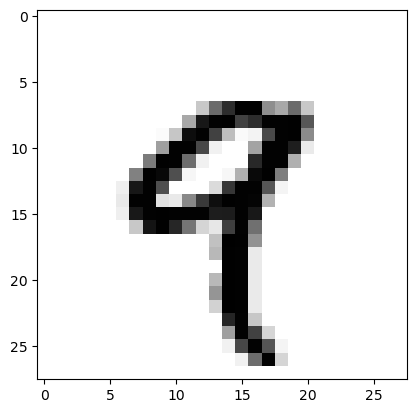

In [40]:
import matplotlib.pyplot as plt 
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()